In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
sales=pd.read_csv('https://raw.githubusercontent.com/dsrscientist/DSData/master/Advertising.csv')
sales.head(5)

,Unnamed: 0,TV,radio,newspaper,sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9


In [4]:
sales.isnull().sum()

Unnamed: 0    0
TV            0
radio         0
newspaper     0
sales         0
dtype: int64

In [5]:
sales.describe()

,Unnamed: 0,TV,radio,newspaper,sales
count,200.000000,200.000000,200.000000,200.000000,200.000000
mean,100.500000,147.042500,23.264000,30.554000,14.022500
std,57.879185,85.854236,14.846809,21.778621,5.217457
min,1.000000,0.700000,0.000000,0.300000,1.600000
25%,50.750000,74.375000,9.975000,12.750000,10.375000
50%,100.500000,149.750000,22.900000,25.750000,12.900000
75%,150.250000,218.825000,36.525000,45.100000,17.400000
max,200.000000,296.400000,49.600000,114.000000,27.000000


In [6]:
sales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  200 non-null    int64  
 1   TV          200 non-null    float64
 2   radio       200 non-null    float64
 3   newspaper   200 non-null    float64
 4   sales       200 non-null    float64
dtypes: float64(4), int64(1)
memory usage: 7.9 KB


In [7]:
import seaborn as sns

In [8]:
y=sales['sales']
x=sales.drop(columns=['sales'])

In [9]:
sales=sales.drop(columns=['Unnamed: 0'])

In [10]:
sales.head(5)

,TV,radio,newspaper,sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


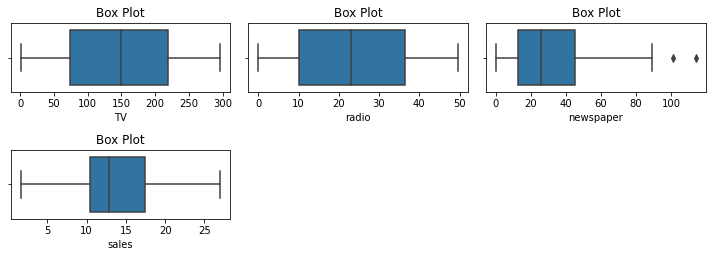

In [11]:
plt.figure(figsize=(10,5),facecolor='white')
plot = 1
for column in sales:
    if plot<=9:
        plt.subplot(3,3,plot)
        sns.boxplot(sales[column])
        plt.xlabel(column)
        plt.title("Box Plot")
    plot+=1
plt.tight_layout()

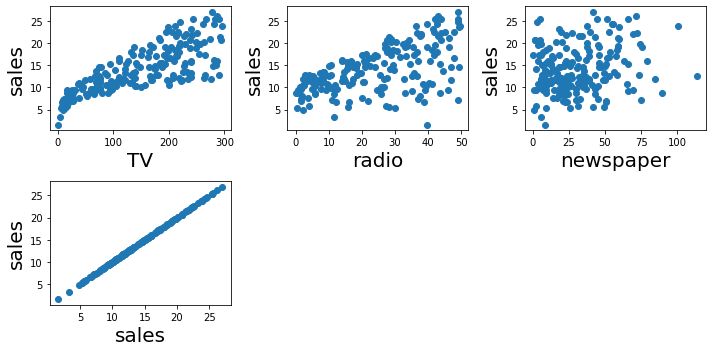

In [12]:
plt.figure(figsize=(10,5),facecolor='white')
plotnumber = 1
for columns in sales:
    if plotnumber <= 6:
        ax=plt.subplot(2,3,plotnumber)
        plt.scatter(sales[columns],y)
        plt.xlabel(columns,fontsize=20)
        plt.ylabel('sales',fontsize=20)
    plotnumber += 1
    plt.tight_layout()

<AxesSubplot:>

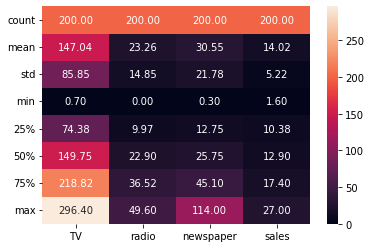

In [13]:
sns.heatmap(sales.describe(),annot=True,linecolor='black',fmt='0.2f')

In [14]:
from sklearn.model_selection import train_test_split

In [15]:
sales.corr()

,TV,radio,newspaper,sales
TV,1.000000,0.054809,0.056648,0.782224
radio,0.054809,1.000000,0.354104,0.576223
newspaper,0.056648,0.354104,1.000000,0.228299
sales,0.782224,0.576223,0.228299,1.000000


In [16]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

In [17]:
scaler=StandardScaler()
xnew=sales.drop('sales',axis=1)
x_scaled=scaler.fit_transform(xnew)

In [18]:
pca=PCA()

In [19]:
pca.fit(x_scaled)

PCA()

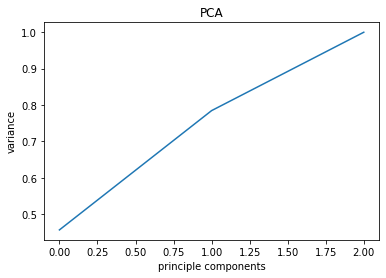

In [20]:
plt.figure()
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('principle components')
plt.ylabel('variance')
plt.title('PCA')
plt.show()

In [21]:
X = sales['TV']
Y = sales['sales']

In [22]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, train_size = 0.7, test_size = 0.3, random_state = 100)

In [23]:
X_train.head()

74     213.4
3      151.5
185    205.0
26     142.9
90     134.3
Name: TV, dtype: float64

In [24]:
Y_train.head()

74     17.0
3      18.5
185    22.6
26     15.0
90     11.2
Name: sales, dtype: float64

In [25]:
import statsmodels.api as sm

In [26]:
X_train_sm = sm.add_constant(X_train)

lr = sm.OLS(Y_train, X_train_sm).fit()

In [27]:
lr.params

const    6.989666
TV       0.046497
dtype: float64

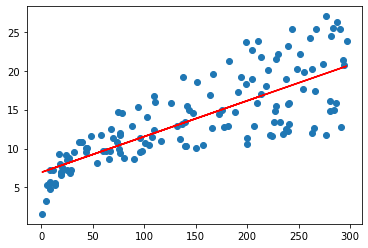

In [28]:
plt.scatter(X_train, Y_train)
plt.plot(X_train, 6.948 + 0.046*X_train, 'r')
plt.show()

In [29]:
Y_train_pred = lr.predict(X_train_sm)
res = (Y_train - Y_train_pred)

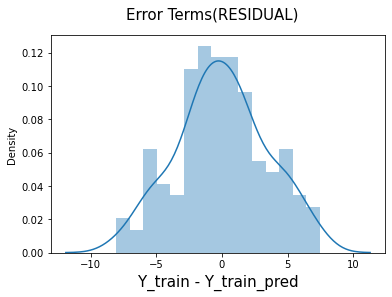

In [30]:
fig = plt.figure()
sns.distplot(res, bins = 15)
fig.suptitle('Error Terms(RESIDUAL)', fontsize = 15)                  
plt.xlabel('Y_train - Y_train_pred', fontsize = 15)        
plt.show()

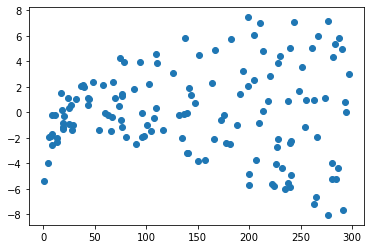

In [31]:
plt.scatter(X_train,res)
plt.show()

In [32]:
X_test_sm = sm.add_constant(X_test)
Y_pred = lr.predict(X_test_sm)
Y_pred.head()

126     7.352345
104    18.065337
99     13.276109
92     17.112141
111    18.228077
dtype: float64

In [33]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

In [34]:
np.sqrt(mean_squared_error(Y_test, Y_pred))

2.8241456288327016

In [35]:
r_squared = r2_score(Y_test, Y_pred)
r_squared

0.5942987267783297